# CarData

#### Car_Name : name car
#### Year : Year of production of each car
#### Selling_Price : Selling price of each car
#### Present_Price : The price that each car has already been traded
#### Kms_Driven : The distance traveled by each car
#### Fuel_Type : The type of fuel for each car
#### Seller_Type : The type of transaction of each car
#### Transmission : Power transmission type
#### Owne : Number of past transactions

### According to the recorded data, our model should be able to guess the price compared to the new data(Selling_Price)

#### Import Librires

In [2]:
# Import Library For Machine Learning Problem
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

# Import Library For Statistical Calculations
import numpy as np

# Import Library For Read Data
import pandas as pd

# Import Library For Vitulzition Data
import matplotlib.pyplot as plt
import seaborn as sns

## Data Extraction

#### Read Data

In [3]:
data = pd.read_csv("cardata.csv")
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


#### Our dataset consists of 300 samples, each of which has 9 features

In [4]:
# Convert Date in dataframe
df = pd.DataFrame(data)
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Static Information

In [5]:
df.describe(include="all")

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


#### Our dataset has 9 features, 6 of which are numerical or continuous and 3 are object or discrete.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


#### The dataset has no null or NAN values

In [7]:
# Construction of age column
df['Age'] = np.abs(df['Year'] - max(df['Year']))

# Remove the car name and year columns
df = df.drop(columns=['Car_Name', 'Year'])
df

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,4
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,5
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,1
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,7
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,4
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,Diesel,Dealer,Manual,0,2
297,4.00,5.90,60000,Petrol,Dealer,Manual,0,3
298,3.35,11.00,87934,Petrol,Dealer,Manual,0,9
299,11.50,12.50,9000,Diesel,Dealer,Manual,0,1


#### After calculating the age for each car using the year column, we remove the car name and year columns from our data set.

## Vsualization and Analyze

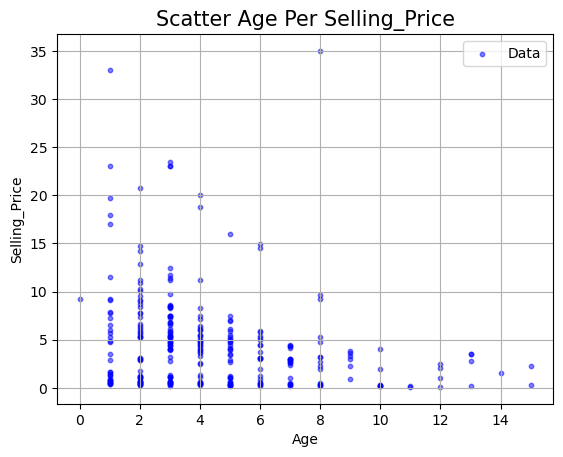

In [8]:
plt.scatter(df.Age, df.Selling_Price, s=10, c='b', alpha=.5, label='Data')
plt.title("Scatter Age Per Selling_Price", fontsize=15)
plt.xlabel("Age", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()
plt.show()

#### In this diagram, it can be seen that the lower the car's production year, the higher the price of that car, or vice versa.

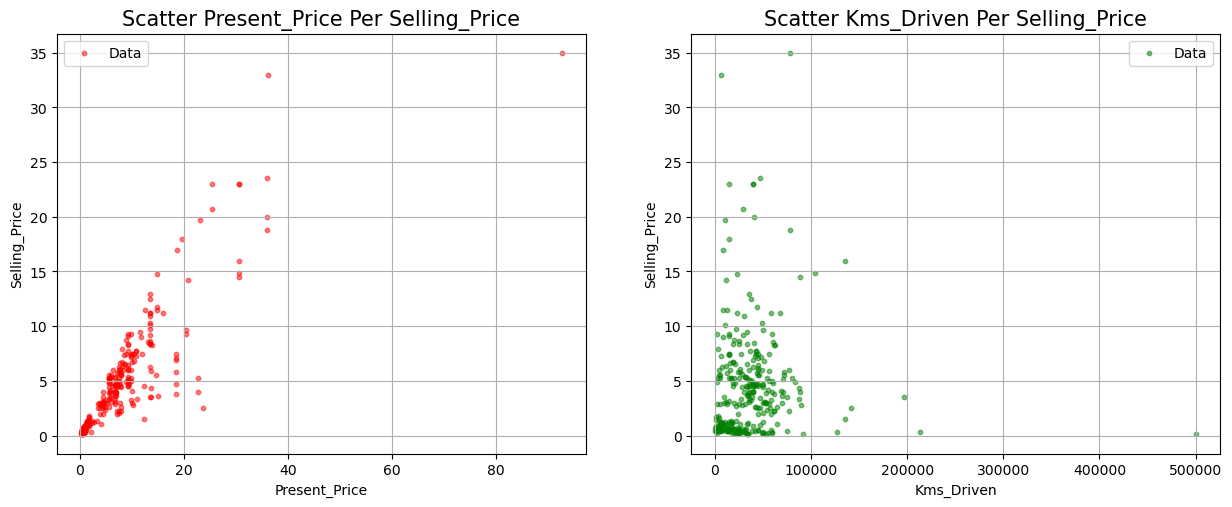

In [9]:
# Plot Features Countinus
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.scatter(df.Present_Price, df.Selling_Price, s=10, c='r', alpha=.5, label='Data')
plt.title("Scatter Present_Price Per Selling_Price", fontsize=15)
plt.xlabel("Present_Price", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()


plt.subplot(2, 2, 2)
plt.scatter(df.Kms_Driven, df.Selling_Price, s=10, c='g', alpha=.5, label='Data')
plt.title("Scatter Kms_Driven Per Selling_Price", fontsize=15)
plt.xlabel("Kms_Driven", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()

plt.show()

#### Present_Price v Selling_Price : In this plot, it can be seen that the higher the previous transaction amount, the higher the price of the car, and there is almost a linear relationship between this feature and the feature of our target.
#### Kms_Driven v Selling_Price : It is not possible to distinguish a relationship in this graph, but it can be imperceptibly seen that the cars that have traveled longer distances have lower prices and vice versa.

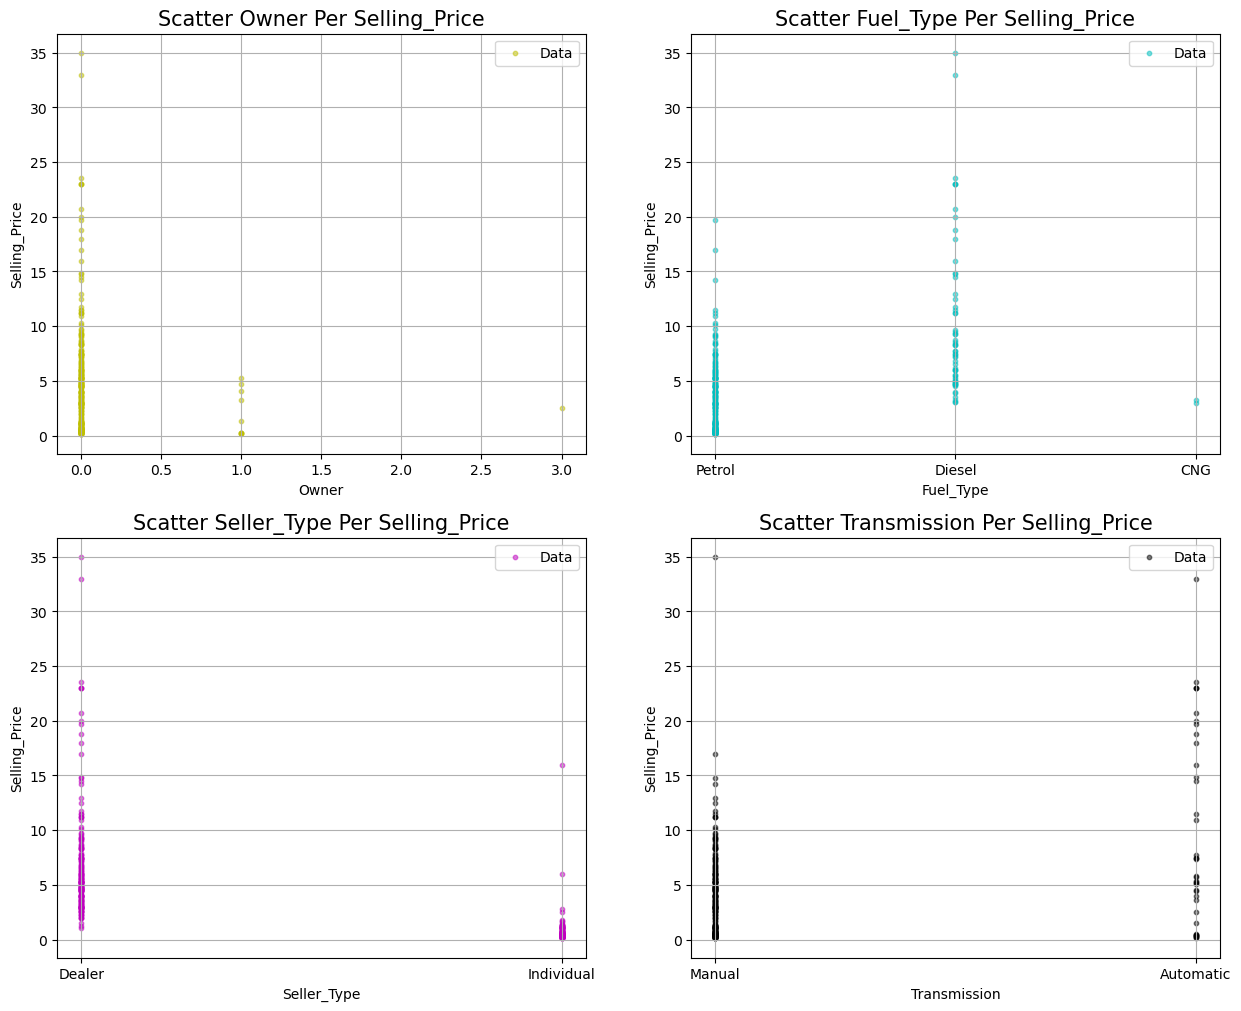

In [10]:
# Plot Features Discrit
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.scatter(df.Owner, df.Selling_Price, s=10, c='y', alpha=.5, label='Data')
plt.title("Scatter Owner Per Selling_Price", fontsize=15)
plt.xlabel("Owner", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.scatter(df.Fuel_Type, df.Selling_Price, s=10, c='c', alpha=.5, label='Data')
plt.title("Scatter Fuel_Type Per Selling_Price", fontsize=15)
plt.xlabel("Fuel_Type", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
plt.scatter(df.Seller_Type, df.Selling_Price, s=10, c='m', alpha=.5, label='Data')
plt.title("Scatter Seller_Type Per Selling_Price", fontsize=15)
plt.xlabel("Seller_Type", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.scatter(df.Transmission, df.Selling_Price, s=10, c='k', alpha=.5, label='Data')
plt.title("Scatter Transmission Per Selling_Price", fontsize=15)
plt.xlabel("Transmission", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()

plt.show()

#### Owner v Selling_Price : The cars that have been less traded in the past have higher prices, but this claim cannot be said definitively.In addition, most of the cars in the data set have not been traded for them.
#### Fuel_Type : The price of diesel fuel is higher than other fuels, but due to the fact that the number is not the same, this issue cannot be raised for sure.
#### Selling_Type v Selling_Price : According to the chart, most of the cars have been sold by brokers (in the next block, I will perform a personal information extraction by Seaburn Library)
#### Transmission v Selling_Price : The number of geared or manual cars is more than automatic cars, but it is the opposite in terms of price, and the price of automatic cars is higher than manual cars, but again, according to the graph, this cannot be said for sure.

In [32]:
sns.set_theme(style="whitegrid")

g = sns.catplot(data=df, kind="bar",x="Age",
                y="Selling_Price", hue='Selling_Type',errorbar="sd",
                palette="dark", alpha=.6, height=6)
g.despine(left=True)
g.set_axis_labels("", "Body mass (g)")
g.legend.set_title("")

ValueError: Could not interpret input 'Selling_Type'

In [30]:
data.Seller_Type

0      Dealer
1      Dealer
2      Dealer
3      Dealer
4      Dealer
        ...  
296    Dealer
297    Dealer
298    Dealer
299    Dealer
300    Dealer
Name: Seller_Type, Length: 301, dtype: object

CNG         2
Diesel     60
Petrol    239
Name: Fuel_Type, dtype: int64
#################################################################################
Individual    106
Dealer        195
Name: Seller_Type, dtype: int64
#################################################################################
Automatic     40
Manual       261
Name: Transmission, dtype: int64
#################################################################################
3      1
1     10
0    290
Name: Owner, dtype: int64
#################################################################################


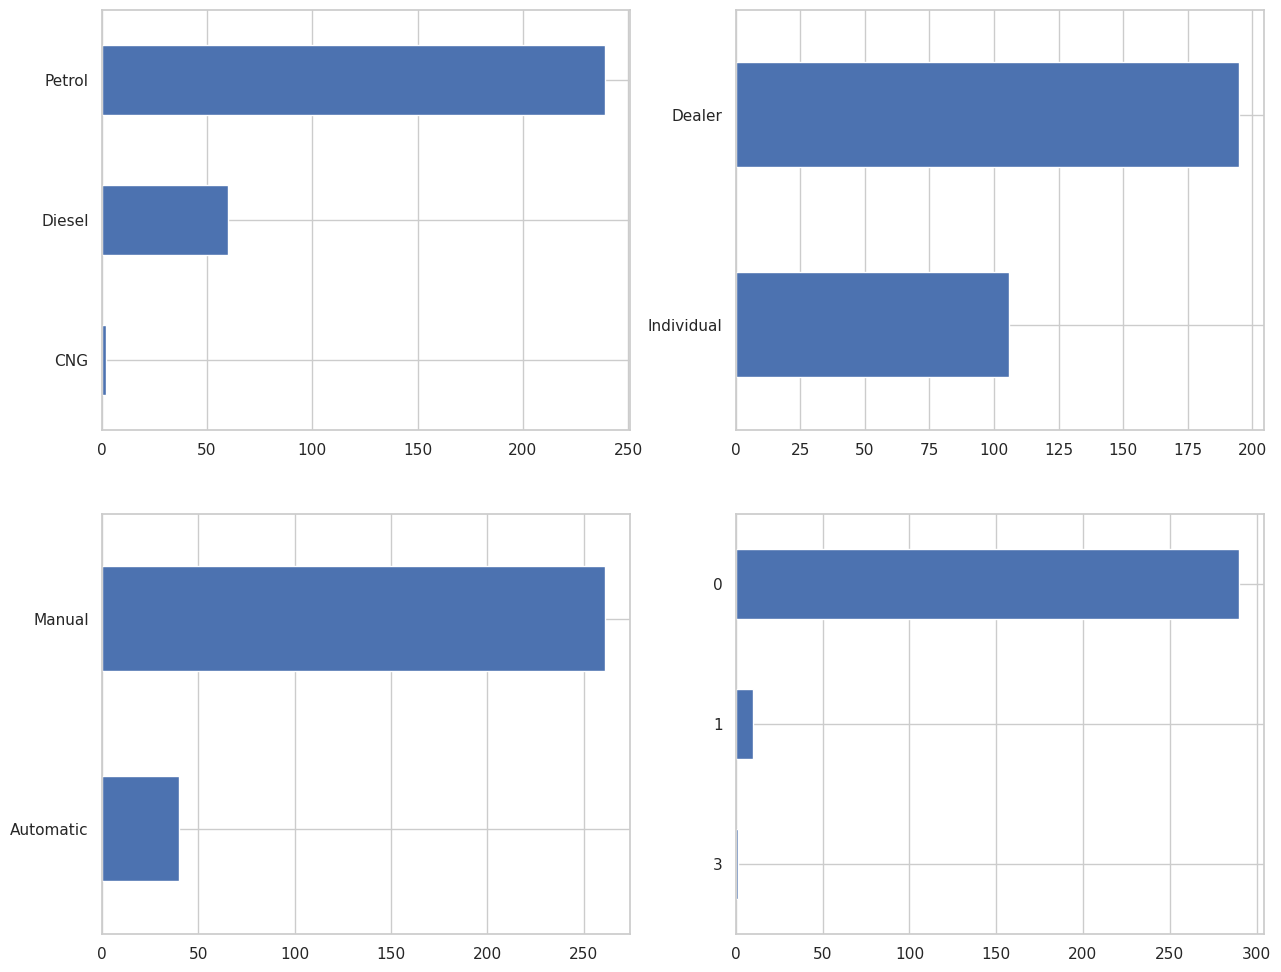

In [26]:
# Plots of the number of each value in the discrete representation
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
df.Fuel_Type.value_counts().sort_values().plot(kind = 'barh')
print(df.Fuel_Type.value_counts().sort_values())
print('#################################################################################')

plt.subplot(2, 2, 2)
df.Seller_Type.value_counts().sort_values().plot(kind = 'barh')
print(df.Seller_Type.value_counts().sort_values())
print('#################################################################################')

plt.subplot(2, 2, 3)
df.Transmission.value_counts().sort_values().plot(kind = 'barh')
print(df.Transmission.value_counts().sort_values())
print('#################################################################################')

plt.subplot(2, 2, 4)
df.Owner.value_counts().sort_values().plot(kind = 'barh')
print(df.Owner.value_counts().sort_values())
print('#################################################################################')


In [ ]:
Mean_KD = np.mean (df.Kms_Driven)
Mean_SP = np.mean (df.Selling_Price)
print('Mean Kms_Driven : \n', Mean_KD)
print('##########################################################################################################')
print('Mean Selling_Price : \n', Mean_SP)
print('##########################################################################################################')

plt.figure(figsize=(8,6))
plt.scatter(df.Kms_Driven, df.Selling_Price, s=25, c='c', alpha=.5, label='Data')
plt.plot((Mean_KD , Mean_KD), (0, max(df.Selling_Price)), 'r', label='Linear Avrage Kms_Driven' )
plt.plot((0, max(df.Kms_Driven)), (Mean_SP, Mean_SP), 'y',  label='Linear Avrage Selling_Price' )
plt.title('Scatter Detected Noise By Avrage Date', fontsize=15)
plt.xlabel("Kms_Driven", fontsize=10)
plt.ylabel("Selling_Price", fontsize=10)
plt.legend()
plt.grid()
plt.show()


In [ ]:
df_OHE = pd.get_dummies(df, columns=['Fuel_Type', 'Seller_Type', 'Transmission'], drop_first=True)
df_OHE

In [ ]:
corr_matrix = df_OHE.corr()
corr_matrix['Selling_Price'].sort_values(ascending=False)

In [ ]:
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation matrix of Breast Cancer data", fontsize=15)
plt.show()

In [ ]:
def test_size(df):
    test_list = []
    X = df.iloc[:, 1:8]
    Y = df.iloc[:, 0].values.reshape(-1, 1)
    for test in range(1, 6):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=(test/10), random_state=0)
        regressor = LinearRegression() 
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        R2_score = metrics.r2_score(y_test, y_pred)*100
        test_list.append(R2_score)
    print('Scores : ')
    print(test_list)
    print("######################################################################################################")
    return test_list


plt.plot(test_size(df_OHE), 'c', label='Evaluation Linear' )
plt.title("Evaluated Test_Size Per Scores", fontsize=15)
plt.xlabel('Test_Size', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(range(0, 5), ['90-10', '80-20', '70-30', '60-40', '50-50'])
plt.legend()
plt.grid()
plt.show()

In [ ]:
def kfold_valedation(df):
    kfold_list = []
    X = df.iloc[:, 1:8]
    Y = df.iloc[:, 0].values.reshape(-1, 1)
    for k in range (2, 11):
        regressor = LinearRegression()
        kfold_validation = KFold (k, shuffle=True, random_state=0)
        result = cross_val_score(regressor, X, Y , cv=kfold_validation)
        mean = np.mean(result)
        print('Fold : ', str(k))
        print(result)
        print("Mean Fold : ")
        print(mean)
        print('######################################################################################################')
        kfold_list.append(mean)
    return kfold_list
    
    

plt.plot(kfold_valedation(df_OHE), 'k', label='Evaluation Linear' )
plt.title("Evaluated KFold Per Each Scores", fontsize=15)
plt.xlabel('K', fontsize=10)
plt.ylabel('Score', fontsize=10)
plt.xticks(range(0, 9), [x for x in range(2, 11)])
plt.legend()
plt.grid()
plt.show()

In [ ]:
X = df_OHE.iloc[:, 1:8]
Y = df_OHE.iloc[:, 0].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
R2_score = metrics.r2_score(y_test, y_pred)*100
score = regressor.score(x_train, y_train)*100
print('Train_Score :\n', score)
print('Test_Score :\n', R2_score)

In [ ]:
compale2 = pd.DataFrame({'Actual': y_test.flatten(),
                        'Prediction': y_pred.flatten()})
compale2

In [ ]:
print ('Intercept : \n', regressor.intercept_)
print('Coef : \n', regressor.coef_)

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(X)
x_poly = pd.DataFrame(x_poly, columns=poly_features.get_feature_names_out(X.columns))
x_poly.shape

In [ ]:
def feature_selection (df, df2):
    
    Train_Score = []
    Test_Score = []
    
    for columns in range (0, 35):    
        df_addfeature = pd.concat([df, df2.iloc[:,columns]], axis=1)
        
        X = df_addfeature.iloc[:, 1:10]
        Y = df_addfeature.iloc[:, 0].values.reshape(-1, 1) 
        x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=0)
        regressor = LinearRegression() 
        regressor.fit(x_train, y_train)
        y_pred = regressor.predict(x_test)
        R2_score = metrics.r2_score(y_test, y_pred)*100
        score = regressor.score(x_train, y_train)*100
        Train_Score.append(score)
        Test_Score.append(R2_score)
        
    plt.figure(figsize=(10, 8))
    plt.plot(Train_Score, "r", label="Train_Score")
    plt.plot(Test_Score, "c", label="Test_Score")
    plt.title("Plot Train and Test Per Scores In Each Feature", fontsize=15)
    plt.xlabel("Feature")
    plt.ylabel("Score")
    plt.xticks(range(0, 35), [label for label in df2.columns], rotation=90)
    plt.legend()
    plt.grid()
    plt.show()           
        
feature_selection(df_OHE, x_poly)

In [ ]:
df_AddFtr = pd.concat([df_OHE, x_poly.iloc[:,8]], axis=1)
df_AddFtr

In [ ]:
X = df_AddFtr.iloc[:, 1:10]
Y = df_AddFtr.iloc[:, 0].values.reshape(-1, 1) 
x_train2, x_test2, y_train2, y_test2  = train_test_split(X, Y, test_size=.2, random_state=0)
regressor = LinearRegression() 
regressor.fit(x_train2, y_train2)
y_pred2 = regressor.predict(x_test2)
R2_score = metrics.r2_score(y_test2, y_pred2)*100
score = regressor.score(x_train2, y_train2)*100
print("Test_Score : " , score)

In [ ]:
print("Intercept : \n", regressor.intercept_)
print("Coef : \n" , regressor.coef_)

In [ ]:
compale3 = pd.DataFrame({'Actual': y_test2.flatten(),
                        'Pridiction': y_pred2.flatten()})
compale3

In [ ]:
x_test2.insert(9, 'y_test', y_test2) 
x_test2.insert(10, 'y_pred', y_pred2)
x_test2

In [ ]:
Test_Sort = x_test2.sort_values(by='Present_Price')
Test_Sort

In [ ]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.scatter(x_test2.Present_Price, y_test2,  label='Actual Data')
plt.scatter(x_test2.Present_Price, y_pred2, label='Prediction Data')
plt.title('Scatter Evaluation Final Model', fontsize=15)
plt.xlabel("X_Test")
plt.ylabel("Y_Actual and Y_Prediction")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.scatter(Test_Sort.Present_Price, y_test2, label='Actual Data')
plt.plot(Test_Sort.Present_Price, y_pred2, 'r--o', label='Prediction Data')
plt.title('Plot Evaluation Final Model', fontsize=15)
plt.xlabel("X_Test")
plt.ylabel("Y_Actual and Y_Prediction")
plt.legend()
plt.grid()

plt.show()

In [ ]:
Df_New = pd.DataFrame({'Selling_Price':[0],
                       'Present_Price':[11.23],
                       'Kms_Driven':[42.000],
                       'Owner':[1],
                       'Age':[10],
                       'Fuel_Type_Diesel':[0],
                       'Fuel_Type_Petrol':[1],
                       'Seller_Type_Individual':[0],
                       'Transmission_Manual':[1],
                       'Present_Price Kms_Driven':[471.66]})
Df_New                     

In [ ]:
Df_Concat = pd.concat([df_AddFtr, Df_New])
Df_Concat.reset_index(inplace=True)
Df_Concat.drop(columns=['index'], inplace=True)

In [ ]:
scale = MinMaxScaler(feature_range=(0, 1))
norm = scale.fit_transform(Df_Concat.iloc[:, 1:10])
norm = pd.DataFrame(norm, columns=[columns for columns in Df_Concat.columns[1:10]])
df_Scale = pd.concat([norm, Df_Concat.iloc[:, 0]], axis=1, sort=True)
df_Scale

In [ ]:
Train = df_Scale[:301]
Test = df_Scale.iloc[301:]

In [ ]:
x_Train = Train.iloc[:301, :9]
y_Train = Train.Selling_Price.values.reshape(-1, 1)

In [ ]:
x_Test = Test.iloc[:301, :9]
x_Test

In [ ]:
regressor = LinearRegression() 
regressor.fit(x_Train, y_Train)
y_pred3 = regressor.predict(x_Test)
y_pred3